In [2]:
%pip install statsmodels pytest

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.3/342.3 KB 3.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import yfinance as yf # https://aroussi.com/post/python-yahoo-finance
from pathlib import Path
import pandas as pd

In [3]:
CONFIG = {
    "indices": [
        "^GSPC", # S&P500
        "MMM", "AOS", "ABT", "ABBV", "ACN", "ADBE", "AMD", "AES", "AFL", "A", "APD", "ABNB", "AKAM", "ALB", "ARE", "ALGN", "ALLE", "LNT", "ALL", "GOOGL", "GOOG", "MO", "AMZN", "AMCR", "AMTM", "AEE", "AEP", "AXP", "AIG", "AMT", "AWK", "AMP", "AME", "AMGN", "APH", "ADI", "ANSS", "AON", "APA", "AAPL", "AMAT", "APTV", "ACGL", "ADM", "ANET", "AJG", "AIZ", "T", "ATO", "ADSK", "ADP", "AZO", "AVB", "AVY", "AXON", "BKR", "BALL", "BAC", "BAX", "BDX", "BRK.B", "BBY", "TECH", "BIIB", "BLK", "BX", "BK", "BA", "BKNG", "BWA", "BSX", "BMY", "AVGO", "BR", "BRO", "BF.B", "BLDR", "BG", "BXP", "CHRW", "CDNS", "CZR", "CPT", "CPB", "COF", "CAH", "KMX", "CCL", "CARR", "CTLT", "CAT", "CBOE", "CBRE", "CDW", "CE", "COR", "CNC", "CNP", "CF", "CRL", "SCHW", "CHTR", "CVX", "CMG", "CB", "CHD", "CI", "CINF", "CTAS", "CSCO", "C", "CFG", "CLX", "CME", "CMS", "KO", "CTSH", "CL", "CMCSA", "CAG", "COP", "ED", "STZ", "CEG", "COO", "CPRT", "GLW", "CPAY", "CTVA", "CSGP", "COST", "CTRA", "CRWD", "CCI", "CSX", "CMI", "CVS", "DHR", "DRI", "DVA", "DAY", "DECK", "DE", "DELL", "DAL", "DVN", "DXCM", "FANG", "DLR", "DFS", "DG", "DLTR", "D", "DPZ", "DOV", "DOW", "DHI", "DTE", "DUK", "DD", "EMN", "ETN", "EBAY", "ECL", "EIX", "EW", "EA", "ELV", "EMR", "ENPH", "ETR", "EOG", "EPAM", "EQT", "EFX", "EQIX", "EQR", "ERIE", "ESS", "EL", "EG", "EVRG", "ES", "EXC", "EXPE", "EXPD", "EXR", "XOM", "FFIV", "FDS", "FICO", "FAST", "FRT", "FDX", "FIS", "FITB", "FSLR", "FE", "FI", "FMC", "F", "FTNT", "FTV", "FOXA", "FOX", "BEN", "FCX", "GRMN", "IT", "GE", "GEHC", "GEV", "GEN", "GNRC", "GD", "GIS", "GM", "GPC", "GILD", "GPN", "GL", "GDDY", "GS", "HAL", "HIG", "HAS", "HCA", "DOC", "HSIC", "HSY", "HES", "HPE", "HLT", "HOLX", "HD", "HON", "HRL", "HST", "HWM", "HPQ", "HUBB", "HUM", "HBAN", "HII", "IBM", "IEX", "IDXX", "ITW", "INCY", "IR", "PODD", "INTC", "ICE", "IFF", "IP", "IPG", "INTU", "ISRG", "IVZ", "INVH", "IQV", "IRM", "JBHT", "JBL", "JKHY", "J", "JNJ", "JCI", "JPM", "JNPR", "K", "KVUE", "KDP", "KEY", "KEYS", "KMB", "KIM", "KMI", "KKR", "KLAC", "KHC", "KR", "LHX", "LH", "LRCX", "LW", "LVS", "LDOS", "LEN", "LLY", "LIN", "LYV", "LKQ", "LMT", "L", "LOW", "LULU", "LYB", "MTB", "MRO", "MPC", "MKTX", "MAR", "MMC", "MLM", "MAS", "MA", "MTCH", "MKC", "MCD", "MCK", "MDT", "MRK", "META", "MET", "MTD", "MGM", "MCHP", "MU", "MSFT", "MAA", "MRNA", "MHK", "MOH", "TAP", "MDLZ", "MPWR", "MNST", "MCO", "MS", "MOS", "MSI", "MSCI", "NDAQ", "NTAP", "NFLX", "NEM", "NWSA", "NWS", "NEE", "NKE", "NI", "NDSN", "NSC", "NTRS", "NOC", "NCLH", "NRG", "NUE", "NVDA", "NVR", "NXPI", "ORLY", "OXY", "ODFL", "OMC", "ON", "OKE", "ORCL", "OTIS", "PCAR", "PKG", "PLTR", "PANW", "PARA", "PH", "PAYX", "PAYC", "PYPL", "PNR", "PEP", "PFE", "PCG", "PM", "PSX", "PNW", "PNC", "POOL", "PPG", "PPL", "PFG", "PG", "PGR", "PLD", "PRU", "PEG", "PTC", "PSA", "PHM", "QRVO", "PWR", "QCOM", "DGX", "RL", "RJF", "RTX", "O", "REG", "REGN", "RF", "RSG", "RMD", "RVTY", "ROK", "ROL", "ROP", "ROST", "RCL", "SPGI", "CRM", "SBAC", "SLB", "STX", "SRE", "NOW", "SHW", "SPG", "SWKS", "SJM", "SW", "SNA", "SOLV", "SO", "LUV", "SWK", "SBUX", "STT", "STLD", "STE", "SYK", "SMCI", "SYF", "SNPS", "SYY", "TMUS", "TROW", "TTWO", "TPR", "TRGP", "TGT", "TEL", "TDY", "TFX", "TER", "TSLA", "TXN", "TXT", "TMO", "TJX", "TSCO", "TT", "TDG", "TRV", "TRMB", "TFC", "TYL", "TSN", "USB", "UBER", "UDR", "ULTA", "UNP", "UAL", "UPS", "URI", "UNH", "UHS", "VLO", "VTR", "VLTO", "VRSN", "VRSK", "VZ", "VRTX", "VTRS", "VICI", "V", "VST", "VMC", "WRB", "GWW", "WAB", "WBA", "WMT", "DIS", "WBD", "WM", "WAT", "WEC", "WFC", "WELL", "WST", "WDC", "WY", "WMB", "WTW", "WYNN", "XEL", "XYL", "YUM", "ZBRA", "ZBH", "ZT", 
    ],
}

DATA_PATH = Path("data")
INITIAL_DATA_PATH = DATA_PATH/"raw"
FINAL_DATA_PATH = DATA_PATH/"processed"

In [7]:
data = yf.download(" ".join(CONFIG["indices"]), start="2010-01-01", end="2024-01-31", group_by="ticker", auto_adjust=True, repair=True)
# data.to_pickle("raw.pkl")

[*********************100%***********************]  504 of 504 completed

7 Failed downloads:
['GEV', 'SOLV', 'SW', 'AMTM']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2010-01-01 -> 2024-01-31) (Yahoo error = "Data doesn\'t exist for startDate = 1262322000, endDate = 1706677200")')
['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2010-01-01 -> 2024-01-31)')
['BRK.B', 'ZT']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


In [17]:
data = pd.read_pickle("raw.pkl")
data

Ticker                            TYL                                      \
Price                            Open        High         Low       Close   
Date                                                                        
2010-01-04 00:00:00+00:00   20.049999   20.309999   20.049999   20.299999   
2010-01-05 00:00:00+00:00   20.219999   21.360001   20.020000   20.780001   
2010-01-06 00:00:00+00:00   20.799999   21.520000   20.700001   20.770000   
2010-01-07 00:00:00+00:00   20.690001   20.840000   20.350000   20.500000   
2010-01-08 00:00:00+00:00   20.400000   20.740000   20.400000   20.740000   
...                               ...         ...         ...         ...   
2024-01-24 00:00:00+00:00  447.970001  451.709991  439.109985  439.290009   
2024-01-25 00:00:00+00:00  441.600006  441.600006  428.420013  429.250000   
2024-01-26 00:00:00+00:00  429.529999  432.589996  428.320007  430.619995   
2024-01-29 00:00:00+00:00  432.089996  436.410004  430.209991  436.410004   
2024-01-30 00:00:00+00:00  434.269989  437.000000  431.929993  432.059998   

Ticker                                             HAL                        \
Price                      Volume Repaired?       Open       High        Low   
Date                                                                           
2010-01-04 00:00:00+00:00  175300     False  24.386298  24.878470  24.338669   
2010-01-05 00:00:00+00:00  416700     False  24.830845  25.267448  24.600635   
2010-01-06 00:00:00+00:00  274600     False  25.196001  25.870752  25.116618   
2010-01-07 00:00:00+00:00  164100     False  25.648485  25.815188  25.338892   
2010-01-08 00:00:00+00:00   69000     False  26.156536  27.101187  25.791377   
...                           ...       ...        ...        ...        ...   
2024-01-24 00:00:00+00:00  252000     False  35.128161  36.378519  34.931253   
2024-01-25 00:00:00+00:00  230100     False  36.506506  36.673875  35.443208   
2024-01-26 00:00:00+00:00  153500     False  36.299751  37.274441  36.191452   
2024-01-29 00:00:00+00:00  148100     False  36.673877  36.782176  36.201301   
2024-01-30 00:00:00+00:00  136100     False  35.393981  36.437584  34.596508   

Ticker                                ...        MSFT                        \
Price                          Close  ...         Low       Close    Volume   
Date                                  ...                                     
2010-01-04 00:00:00+00:00  24.807026  ...   23.075748   23.347317  38409100   
2010-01-05 00:00:00+00:00  25.124559  ...   23.113469   23.354862  49749600   
2010-01-06 00:00:00+00:00  25.719927  ...   23.022945   23.211535  58182400   
2010-01-07 00:00:00+00:00  25.783434  ...   22.774012   22.970144  50559700   
2010-01-08 00:00:00+00:00  27.085310  ...   22.811729   23.128559  51197400   
...                              ...  ...         ...         ...       ...   
2024-01-24 00:00:00+00:00  36.260376  ...  398.273310  400.371826  24867000   
2024-01-25 00:00:00+00:00  36.427742  ...  400.342004  402.669281  21021200   
2024-01-26 00:00:00+00:00  36.949543  ...  400.242559  401.734406  17803300   
2024-01-29 00:00:00+00:00  36.614803  ...  402.132203  407.492920  24510200   
2024-01-30 00:00:00+00:00  36.240681  ...  404.240727  406.369080  33477600   

Ticker                                      ROK                          \
Price                     Repaired?        Open        High         Low   
Date                                                                      
2010-01-04 00:00:00+00:00     False   34.894110   35.150630   34.454359   
2010-01-05 00:00:00+00:00     False   34.923402   35.047997   34.549614   
2010-01-06 00:00:00+00:00     False   34.703534   35.385146   34.615585   
2010-01-07 00:00:00+00:00     False   35.341168   35.817561   35.033342   
2010-01-08 00:00:00+00:00     False   35.641667   36.286630   35.436448   
...                             ...         ...         ...         ...   
2024-01-24 00:00:0

In [32]:
stats

,mean_volume,mean_dollar_volume,annual_return,annual_volatility
Ticker,,,,
A,2.929012e+06,1.471872e+08,0.176276,0.286979
AAPL,2.412349e+08,7.507605e+09,0.279523,0.281756
ABBV,7.536931e+06,5.118688e+08,0.216744,0.265102
ABNB,6.499788e+06,9.023591e+08,0.148348,0.526642
ABT,8.434661e+06,3.751192e+08,0.150497,0.216405
...,...,...,...,...
YUM,3.506792e+06,1.863955e+08,0.165154,0.240301
ZBH,1.463789e+06,1.368535e+08,0.093433,0.258805
ZBRA,3.815494e+05,6.248705e+07,0.220095,0.360983


In [57]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1 = stats.quantile(0.25)
Q3 = stats.quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the condition for outliers
outliers = ((stats < (Q1 - 1.5 * IQR)) | (stats > (Q3 + 1.5 * IQR)))

# Filter the DataFrame to keep only the rows that have outliers
stats[outliers.any(axis=1)]

,mean_volume,mean_dollar_volume,annual_return,annual_volatility
Ticker,,,,
AAPL,2.412349e+08,7.507605e+09,0.279523,0.281756
ABNB,6.499788e+06,9.023591e+08,0.148348,0.526642
ADBE,3.757541e+06,6.304086e+08,0.251802,0.316803
AMAT,1.228526e+07,4.361492e+08,0.257377,0.361479
AMD,4.620592e+07,2.165882e+09,0.360750,0.562890
...,...,...,...,...
VZ,1.718999e+07,5.521725e+08,0.088913,0.183371
WFC,2.514485e+07,8.161997e+08,0.115828,0.299582
WMT,2.625664e+07,6.878190e+08,0.120139,0.192450


In [66]:
stats.iloc[stats["mean_dollar_volume"].argmax()]

mean_volume           9.690065e+07
mean_dollar_volume    7.775336e+09
annual_return         5.143102e-01
annual_volatility     5.689045e-01
Name: TSLA, dtype: float64

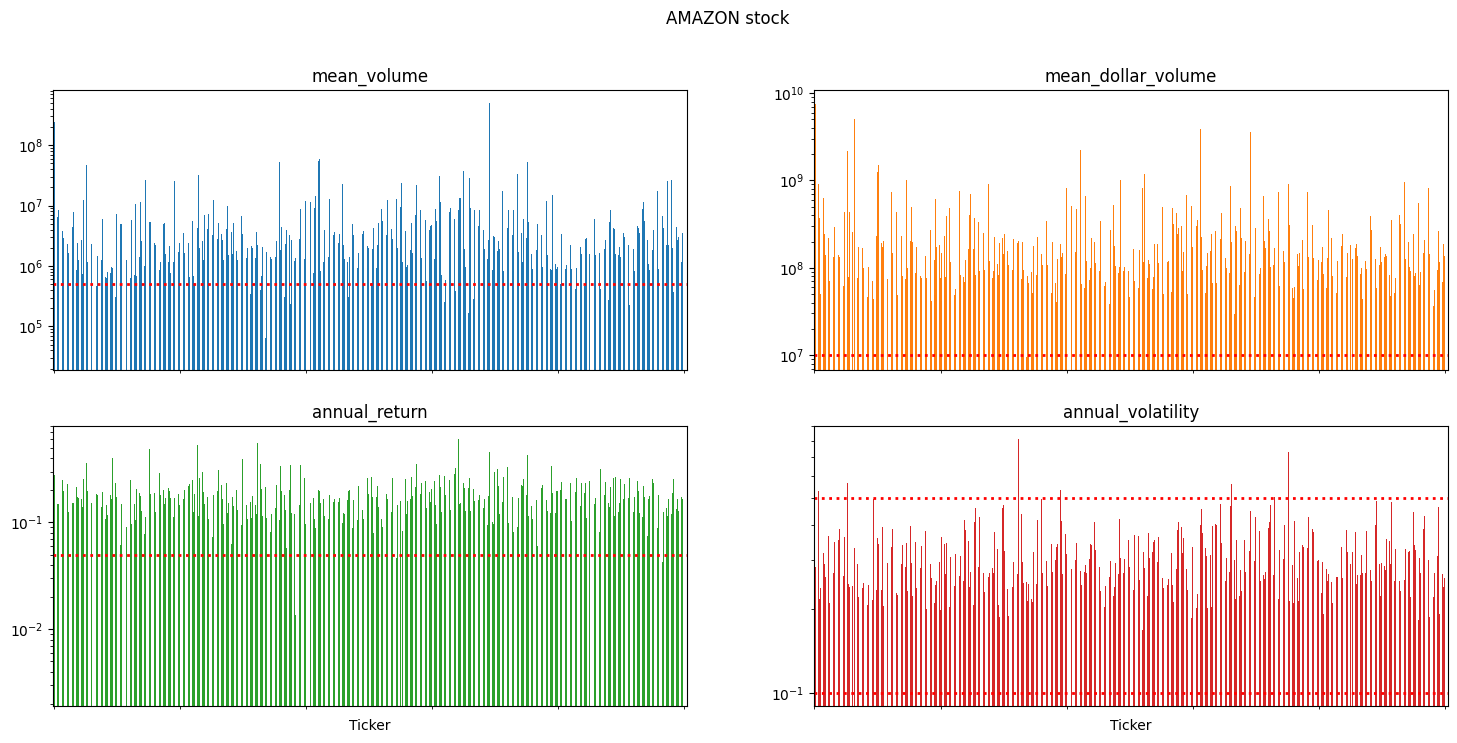

In [ ]:
from stock_forecasting.features import *


# stats = calculate_stock_stats()
stats.drop("^GSPC", inplace=True)
ax = stats.plot(kind="bar", subplots=True, layout=(2,2), title="Stock Stats", figsize=(18,8), logy=True, legend=False, xticks=[])
ax[0][0].axhline(y=MIN_MEAN_VOLUME, color='red', linestyle=':', linewidth=2)
ax[0][1].axhline(y=MIN_MEAN_DOLLAR_VOLUME, color='red', linestyle=':', linewidth=2)
ax[1][0].axhline(y=MIN_ANNUAL_RETURN, color='red', linestyle=':', linewidth=2)
ax[1][1].axhline(y=MIN_ANNUAL_VOLATILITY, color='red', linestyle=':', linewidth=2)
ax[1][1].axhline(y=MAX_ANNUAL_VOLATILITY, color='red', linestyle=':', linewidth=2)

In [ ]:
from stock_forecasting.features import filter_stocks, add_features

# filter_stocks()
add_features()

In [3]:
data = pd.read_pickle("../data/processed/extra_features.pkl")
data

Ticker                           HAL                                   \
Price                           Open       High        Low      Close   
Date                                                                    
2010-01-04 00:00:00+00:00  24.386298  24.878470  24.338669  24.807026   
2010-01-05 00:00:00+00:00  24.830845  25.267448  24.600635  25.124559   
2010-01-06 00:00:00+00:00  25.196001  25.870752  25.116618  25.719927   
2010-01-07 00:00:00+00:00  25.648485  25.815188  25.338892  25.783434   
2010-01-08 00:00:00+00:00  26.156536  27.101187  25.791377  27.085310   
...                              ...        ...        ...        ...   
2024-01-24 00:00:00+00:00  35.128161  36.378519  34.931253  36.260376   
2024-01-25 00:00:00+00:00  36.506506  36.673875  35.443208  36.427742   
2024-01-26 00:00:00+00:00  36.299751  37.274441  36.191452  36.949543   
2024-01-29 00:00:00+00:00  36.673877  36.782176  36.201301  36.614803   
2024-01-30 00:00:00+00:00  35.393981  36.437584  34.596508  36.240681   

Ticker                                                 K             \
Price                        Volume Repaired?       Open       High   
Date                                                                  
2010-01-04 00:00:00+00:00  11571600     False  30.855259  31.005742   
2010-01-05 00:00:00+00:00  18989700     False  30.560060  30.664242   
2010-01-06 00:00:00+00:00  15720800     False  30.571646  30.756858   
2010-01-07 00:00:00+00:00   8993100     False  30.548492  30.976796   
2010-01-08 00:00:00+00:00  23014600     False  30.849461  30.895765   
...                             ...       ...        ...        ...   
2024-01-24 00:00:00+00:00  14417400     False  52.940986  52.979942   
2024-01-25 00:00:00+00:00  11492100     False  52.288473  53.330541   
2024-01-26 00:00:00+00:00   8835500     False  53.359764  53.651932   
2024-01-29 00:00:00+00:00   5857600     False  53.359760  53.466889   
2024-01-30 00:00:00+00:00  18937100     False  53.311068  53.856448   

Ticker                                           ...           ROK            \
Price                            Low      Close  ... Close_Ratio_2   Trend_2   
Date                                             ...                           
2010-01-04 00:00:00+00:00  30.426955  30.577438  ...           NaN       NaN   
2010-01-05 00:00:00+00:00  30.415363  30.646879  ...      0.996003       NaN   
2010-01-06 00:00:00+00:00  30.444312  30.652676  ...      1.009414       NaN   
2010-01-07 00:00:00+00:00  30.502188  30.953644  ...      1.005462  0.011045   
2010-01-08 00:00:00+00:00  30.675825  30.895765  ...      1.006922  0.029992   
...                              ...        ...  ...           ...       ...   
2024-01-24 00:00:00+00:00  52.025521  52.074219  ...      0.993517  0.002735   
2024-01-25 00:00:00+00:00  52.113171  53.203938  ...      1.006434 -0.017366   
2024-01-26 00:00:00+00:00  53.233156  53.311069  ...      0.997958  0.000068   
2024-01-29 00:00:00+00:00  53.116286  53.359760  ...      1.002666  0.008876   
2024-01-30 00:00:00+00:00  53.077331  53.846710  ...      1.004249  0.001271   

Ticker                                                                      \
Price                     Close_Ratio_5   Trend_5 Close_Ratio_60  Trend_60   
Date                                                                         
2010-01-04 00:00:00+00:00           NaN       NaN            NaN       NaN   
2010-01-05 00:00:00+00:00           NaN       NaN            NaN       NaN   
2010-01-06 00:00:00+00:00           NaN       NaN            NaN       NaN   
2010-01-07 00:00:00+00:00           NaN       NaN            NaN       NaN   
2010-01-08 00:00:00+00:00      1.023720       NaN            NaN       NaN   
...                                 ...       ...            ...       ...   
2024-01-24 00:00:00+00:00      0.992001  0.019824       1.051734  0.155038   
2024-01-25 00:00:00+00:00      1.002141  0.016995       1.062657  0.144889   
202

In [11]:
data.xs("AMZN", level=0, axis=1)

Price,Open,High,Low,Close,Volume,Repaired?,Dollar_Volume,Daily_Return,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,
2010-01-04 00:00:00+00:00,6.812500,6.830500,6.657000,6.695000,151998000,False,1.017627e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05 00:00:00+00:00,6.671500,6.774000,6.590500,6.734500,177038000,False,1.192262e+09,0.005900,0.005900,1.002941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06 00:00:00+00:00,6.730000,6.736500,6.582500,6.612500,143576000,False,9.493963e+08,-0.018116,-0.018116,0.990859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07 00:00:00+00:00,6.600500,6.616000,6.440000,6.500000,220604000,False,1.433926e+09,-0.017013,-0.017013,0.991420,-0.012216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08 00:00:00+00:00,6.528000,6.684000,6.451500,6.676000,196610000,False,1.312568e+09,0.027077,0.027077,1.013358,-0.035129,1.004877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-24 00:00:00+00:00,157.800003,158.509995,156.479996,156.869995,48547300,False,7.615615e+09,0.005448,0.005448,1.002717,0.004406,1.010096,0.018725,1.065184,0.258798,1.253057,0.533111,1.133499,0.721290
2024-01-25 00:00:00+00:00,156.949997,158.509995,154.550003,157.750000,43638600,False,6.883989e+09,0.005610,0.005610,1.002797,0.013459,1.010234,0.033640,1.067534,0.279239,1.257734,0.529630,1.139403,0.728988
2024-01-26 00:00:00+00:00,158.419998,160.720001,157.910004,159.119995,51047400,False,8.122662e+09,0.008685,0.008685,1.004324,0.011058,1.014097,0.027451,1.073607,0.216520,1.266360,0.514248,1.148824,0.711911


array([[<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>, <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>, <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>, <Axes: xlabel='Date'>]], dtype=object)

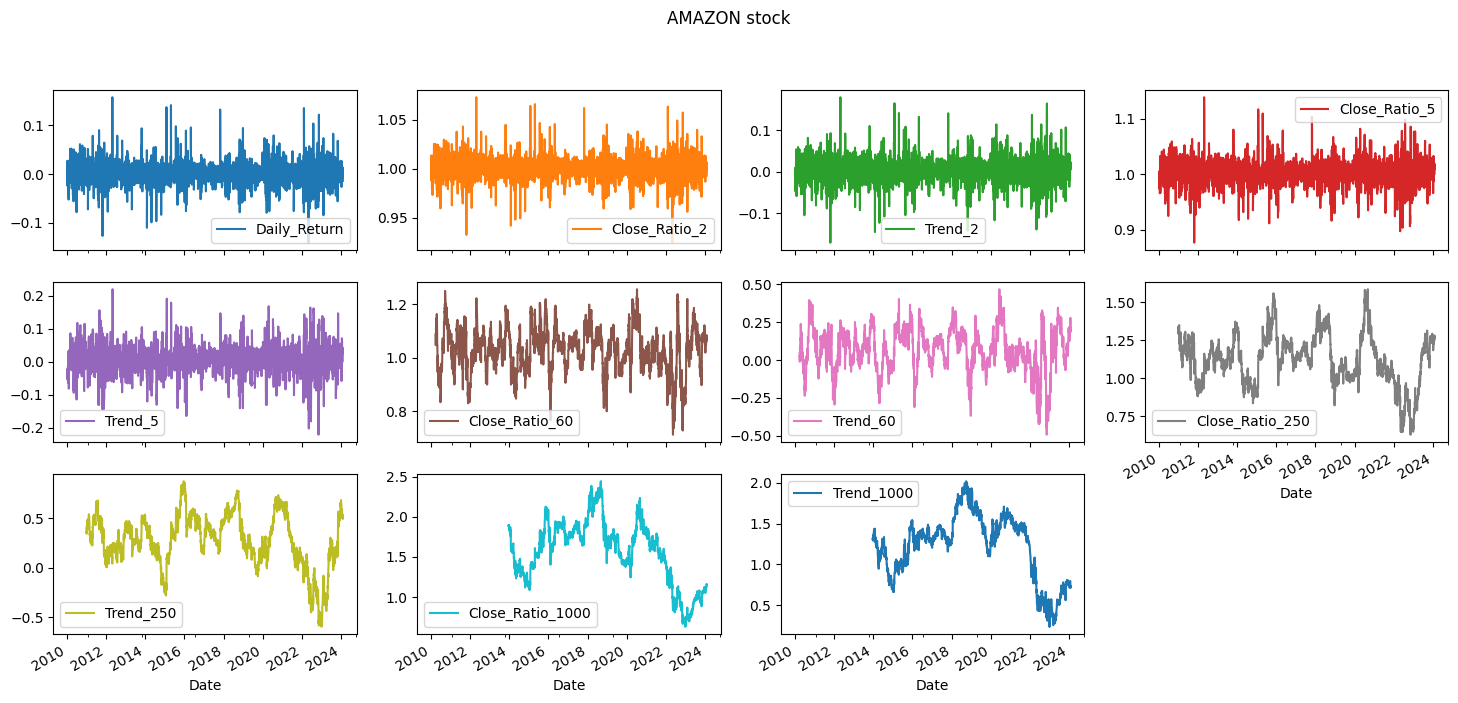

In [21]:
data.xs("AMZN", level=0, axis=1).filter(regex="Close_.*|Daily_Return|Trend_.*").plot(subplots=True, layout=(3,4), title="AMAZON stock", figsize=(18,8))

In [ ]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from stock_forecasting.features import WaveletTransformer
from stock_forecasting.modeling.train import CustomTimeSeriesSplit
from sklearn.metrics import mean_squared_error, make_scorer


X, y = make_regression(n_samples=100, n_features=100, n_targets=1)

pipeline = Pipeline([
    ("preprocessing", StandardScaler()),
    ("wavelet", WaveletTransformer()),
    ("classifier", RandomForestRegressor()),
])

cv = CustomTimeSeriesSplit()
search = RandomizedSearchCV(pipeline, {"classifier__n_estimators": [i for i in range(100, 200, 2)]}, n_iter=2, cv=cv, scoring=make_scorer(mean_squared_error)).fit(X, y)


In [49]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

from stock_forecasting.config import *

In [177]:
processed = pd.read_pickle(PROCESSED_DATA_DIR / "final.pkl")
processed

Ticker                              HAL                                    \
Price                     Close_Ratio_2   Trend_2 Close_Ratio_5   Trend_5   
Date                                                                        
2010-12-31 00:00:00+00:00      0.997801  0.017306      1.010544  0.003041   
2011-01-03 00:00:00+00:00      0.999019  0.001738      1.004139  0.002609   
2011-01-04 00:00:00+00:00      0.985056 -0.003175      0.974955  0.004499   
2011-01-05 00:00:00+00:00      0.998354 -0.015704      0.977872 -0.000237   
2011-01-06 00:00:00+00:00      0.984544 -0.016367      0.961412 -0.006244   
...                                 ...       ...           ...       ...   
2024-01-24 00:00:00+00:00      1.021212  0.019405      1.059307  0.010535   
2024-01-25 00:00:00+00:00      1.002303  0.034306      1.042077  0.020815   
2024-01-26 00:00:00+00:00      1.007111  0.023979      1.036225  0.021317   
2024-01-29 00:00:00+00:00      0.995450  0.009470      1.011422  0.020219   
2024-01-30 00:00:00+00:00      0.994865  0.002632      0.992933  0.015698   

Ticker                                                                        \
Price                     Close_Ratio_60  Trend_60 Close_Ratio_250 Trend_250   
Date                                                                           
2010-12-31 00:00:00+00:00       1.111599  0.003428        1.306845  0.001502   
2011-01-03 00:00:00+00:00       1.105802  0.003399        1.302827  0.001433   
2011-01-04 00:00:00+00:00       1.070865  0.003538        1.263257  0.001331   
2011-01-05 00:00:00+00:00       1.064969  0.002497        1.258187  0.001203   
2011-01-06 00:00:00+00:00       1.030942  0.002524        1.219133  0.000988   
...                                  ...       ...             ...       ...   
2024-01-24 00:00:00+00:00       1.006141 -0.002040        1.025281 -0.000159   
2024-01-25 00:00:00+00:00       1.011902 -0.000934        1.030389 -0.000005   
2024-01-26 00:00:00+00:00       1.027201 -0.000921        1.045413 -0.000084   
2024-01-29 00:00:00+00:00       1.018814 -0.000606        1.036223  0.000021   
2024-01-30 00:00:00+00:00       1.009527 -0.000723        1.026056  0.000002   

Ticker                                K            ...       IPG       CMI  \
Price                     Close_Ratio_2   Trend_2  ...    Target    Target   
Date                                               ...                       
2010-12-31 00:00:00+00:00      0.999609 -0.000293  ... -0.000941 -0.001362   
2011-01-03 00:00:00+00:00      0.998038 -0.000293  ...  0.013183  0.015816   
2011-01-04 00:00:00+00:00      1.004013 -0.002349  ... -0.026951 -0.001342   
2011-01-05 00:00:00+00:00      0.997851  0.002071  ...  0.014326  0.012455   
2011-01-06 00:00:00+00:00      0.998529  0.001885  ... -0.000941 -0.025046   
...                                 ...       ...  ...       ...       ...   
2024-01-24 00:00:00+00:00      0.990919  0.004868  ... -0.001549 -0.001694   
2024-01-25 00:00:00+00:00      1.010731 -0.001165  ...  0.021409  0.012935   
2024-01-26 00:00:00+00:00      1.001006  0.001848  ...  0.001823  0.007452   
2024-01-29 00:00:00+00:00      1.000456  0.011854  ...  0.012735  0.000956   
2024-01-30 00:00:00+00:00      1.004542  0.001463  ... -0.003892  0.008054   

Ticker                           EA      MSCI      SCHW       DLR        DD  \
Price                        Target    Target    Target    Target    Target   
Date                                                                          
2010-12-31 00:00:00+00:00 -0.014440 -0.011418 -0.002332  0.001360 -0.003212   
2011-01-03 00:00:00+00:00  0.000000  0.012577  0.022794  0.011060  0.024605   
2011-01-04 00:00:00+00:00  0.000000 -0.016477 -0.016000 -0.021685 -0.006861   
2011-01-05 00:00:00+00:00 -0.006105  0.013403  0.049942  0.004708 -0.001727   
2011-01-06 00:00:00+00:00 -0.003071 -0.007630 -0.006084  0.013666  0.019031   
...                             ...       ...       ...       ...       ...

In [178]:
processed = (processed - processed.mean()) / processed.std()

In [38]:
X = processed.drop(columns="Target", level=1)
y = processed.xs("Target", level=1, axis=1)
X.shape, y.shape

((3291, 3136), (3291, 392))

In [ ]:
from tensorflow.keras.preprocessing import timeseries_dataset_from_array
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


sample_length = 5
batch_size = 32
input_dataset = timeseries_dataset_from_array(
    X, y, sequence_length=sample_length, sequence_stride=sample_length, batch_size=batch_size)

target_dataset = timeseries_dataset_from_array(
    y, None, sequence_length=sample_length, sequence_stride=sample_length, batch_size=batch_size)

for foo in input_dataset:
    print(foo[1].shape)
    break

model = Sequential([
    layers.Input(shape=(5, 3136)),
    layers.LSTM(3, activation="relu"),
    layers.Dense(1, activation="relu"),
])
model.compile(optimizer='adam', loss='mse')

model.fit(input_dataset)

(32, 392)
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0022


In [181]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
                train_df=processed, val_df=None, test_df=None,
                label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                                enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)

        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                    label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                            marker='X', edgecolors='k', label='Predictions',
                            c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [h]')

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=False,
            batch_size=32,)

        ds = ds.map(self.split_window)

        return ds
    

    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result



Inputs shape (batch, time, features): (32, 10, 3528)
Labels shape (batch, time, features): (32, 5, 392)


Total window size: 15
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [10 11 12 13 14]
Label column name(s): [('A', 'Target'), ('AAPL', 'Target'), ('ABT', 'Target'), ('ACGL', 'Target'), ('ACN', 'Target'), ('ADBE', 'Target'), ('ADI', 'Target'), ('ADM', 'Target'), ('ADP', 'Target'), ('ADSK', 'Target'), ('AEE', 'Target'), ('AEP', 'Target'), ('AES', 'Target'), ('AFL', 'Target'), ('AIG', 'Target'), ('AIZ', 'Target'), ('AJG', 'Target'), ('AKAM', 'Target'), ('ALB', 'Target'), ('ALGN', 'Target'), ('ALL', 'Target'), ('AMAT', 'Target'), ('AME', 'Target'), ('AMGN', 'Target'), ('AMP', 'Target'), ('AMT', 'Target'), ('AMZN', 'Target'), ('AON', 'Target'), ('AOS', 'Target'), ('APD', 'Target'), ('APH', 'Target'), ('ARE', 'Target'), ('ATO', 'Target'), ('AVB', 'Target'), ('AVGO', 'Target'), ('AVY', 'Target'), ('AWK', 'Target'), ('AXON', 'Target'), ('AXP', 'Target'), ('BA', 'Target'), ('BAC', 'Target'), ('BALL', 'Target'), ('BAX', 'Target'), ('BBY', 'Target'), ('BDX', 'Target'), ('BEN', 'Target'), ('B

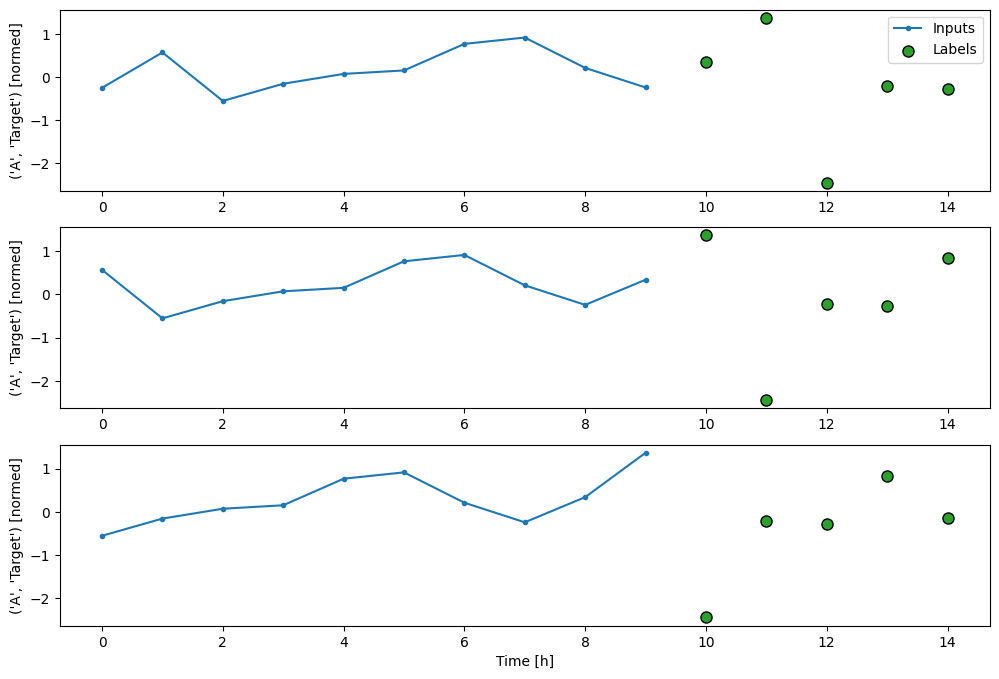

In [182]:
OUT_STEPS = 5
multi_window = WindowGenerator(input_width=10,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS,
                               val_df=processed,
                               label_columns=[(ticker, "Target") for ticker in processed.columns.levels[0]])

multi_window.plot(plot_col=('A', 'Target'))

for example_inputs, example_labels in multi_window.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

multi_window


In [183]:
multi_window.example[0][0, 0, :]

<tf.Tensor: shape=(3528,), dtype=float32, numpy=
array([-0.15944679,  0.8606389 ,  0.32863238, ..., -0.22606984,
        0.06827074, -0.17769724], dtype=float32)>

In [184]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                        validation_data=window.val,
                        callbacks=[early_stopping])
    return history

In [203]:
N_OUTPUTS = 392 # number of stocks

model = Sequential([
    layers.Input(shape=(10, 3528)),
    layers.LSTM(100, activation="relu", return_sequences=True),
    layers.LSTM(100, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(OUT_STEPS*N_OUTPUTS),#, kernel_initializer=tf.initializers.zeros()),
    layers.Reshape([OUT_STEPS, N_OUTPUTS]),
])

history = compile_and_fit(model, multi_window, patience=10)

Epoch 1/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 62s 464ms/step - loss: 0.9550 - mean_absolute_error: 0.6708 - val_loss: 1.0061 - val_mean_absolute_error: 0.6796
Epoch 2/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 47s 443ms/step - loss: 0.9076 - mean_absolute_error: 0.6564 - val_loss: 1.0040 - val_mean_absolute_error: 0.6783
Epoch 3/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 48s 451ms/step - loss: 0.9066 - mean_absolute_error: 0.6558 - val_loss: 1.0017 - val_mean_absolute_error: 0.6775
Epoch 4/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 58s 552ms/step - loss: 0.9063 - mean_absolute_error: 0.6557 - val_loss: 1.0018 - val_mean_absolute_error: 0.6775
Epoch 5/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 60s 553ms/step - loss: 0.9065 - mean_absolute_error: 0.6558 - val_loss: 1.0023 - val_mean_absolute_error: 0.6776
Epoch 6/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 82s 554ms/step - loss: 0.9058 - mean_absolute_error: 0.6555 - val_loss: 1.0045 - val_mean_absolute_error: 0.6778
Epoch 7/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 62s 572ms/step - loss: 0.9067 - mean_absol

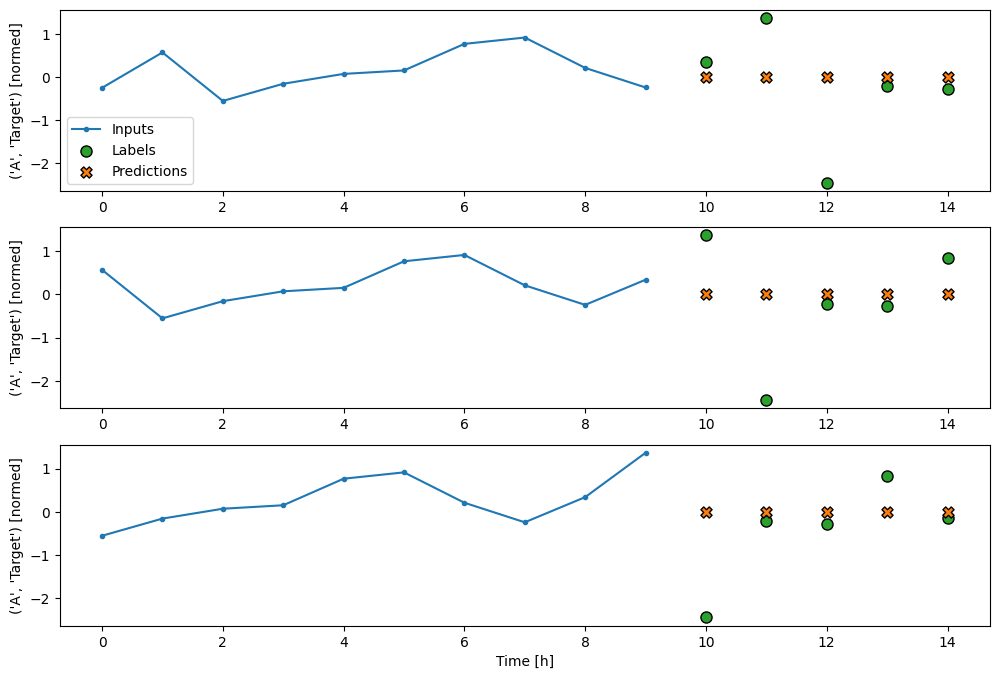

In [204]:
multi_window.plot(model, plot_col=('A', 'Target'))

In [205]:
foo = model.predict(multi_window.train.take(1))
foo.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


(32, 5, 392)

In [208]:
foo[0, 0, :]

array([-2.3152190e-03,  9.0994983e-04,  6.7338871e-04,  6.9080899e-04,
       -3.2845323e-04, -2.4133443e-03,  7.4314105e-04, -6.0234400e-03,
       -3.2848981e-04,  7.7898102e-04, -3.7416825e-03, -4.3961150e-03,
       -2.3322140e-03,  8.4146607e-04, -1.2037551e-03, -1.2827287e-03,
        4.6228427e-03,  8.3309825e-04,  3.6791322e-04, -2.0757704e-03,
       -1.5731427e-03,  4.2766263e-03, -4.4093590e-04, -2.2489456e-03,
       -4.5938825e-04, -5.5139433e-03, -1.6893715e-03,  3.4095196e-03,
       -2.9904468e-03,  6.5317733e-04, -2.0365659e-03, -3.7359265e-03,
       -3.9918302e-03, -2.9382831e-03,  1.7849372e-03,  1.2443208e-03,
       -4.2868592e-03, -3.2493449e-04, -3.7716364e-03, -2.8417478e-03,
       -3.9577209e-03, -6.6605472e-04, -2.8042698e-03, -4.5740744e-03,
       -1.4947262e-05, -3.3429598e-03, -7.9944695e-04, -5.2869385e-03,
       -4.4436878e-04, -5.8229514e-03, -1.8448960e-03, -2.5610400e-03,
       -1.7533596e-03, -3.2652088e-03,  4.6054232e-03, -1.0142580e-03,
      